## TFT - The Correlation Between Player Damage Done and Placement
### Kaitlyn Perkovic
#### December 9th, 2024

Teamfight Tactics is a free-for-all autobattler game created by Riot Games, featuring a handful of the iconic League of Legends Champions- this set, Set 13, features some of the famous and important characters from Arcane. The goal of this game is to grow a board of champions, each with their own trait. Match the trait and your team gets a buff. There are items, augments, and more that will either buff you or your team. 

Players start with one hundred health. Each player combat round, you or your opponent deal player damage: you deal damage to your opponent, or your opponent deals it to you. Once players are at zero or below zero health, they are eliminated. Out of eight players in a lobby, the bottom four are considered the losers of the game and the top four are considered winners.

One of the common conceptions of TFT is that the more player damage a person does, the higher they place. With this, I believe that the more player damage a person does, the higher they place- and vice versa. In this Jupyter Notebook, I will be examining the correlation between my five most recent Teamfight Tactics games, the player damage I did to other players, and my placement to examine if the common conception is correct.


The resources I will be using are:
- Retrieving match material: https://developer.riotgames.com/
- Code Example/Format: https://www.youtube.com/watch?v=jkzq9j5yeT8&list=PL3vL1pnMCbUERqllcwhcvEJbKum-M9zT5
- Course Material: https://github.com/dataesilva/data-emat_fa24



First, I will be identifying my API key in order to access the other API’s I will need- the account and the matches API. Since this API key refreshes every 24 hours, it is completely safe for it to be visible. This API key will be added to the end of the API links that are retrieved from the Riot Games Developer Portal. This will allow me to access the data behind these API links. In order to make sure that these API’s are valid, I request the response code- a 200 means a valid, working API link. I then used json to retrieve the data from these links.


In [2]:
import pandas as pd
import requests
import json
import matplotlib
import base64
import matplotlib.pyplot as plt

In [3]:
api_key = "RGAPI-b7c1e19b-d041-4fd3-99e8-3047f8d1c5e2"

In [4]:
account_api_url = "https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/KSU%20kaitlyn/2640"

In [5]:
requests.get(account_api_url)

<Response [401]>

In [6]:
account_api_url = account_api_url + '?api_key=' + api_key
account_api_url

'https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/KSU%20kaitlyn/2640?api_key=RGAPI-b7c1e19b-d041-4fd3-99e8-3047f8d1c5e2'

In [7]:
account_response = requests.get(account_api_url)
account_response

<Response [200]>

In [8]:
my_account_info = account_response.json()
my_account_info

{'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
 'gameName': 'KSU kaitlyn',
 'tagLine': '2640'}

Here, I will extract my PUUID in order to retrieve the five most recent  matches that I have played. I will then give a variable to each match, starting with m1 being the most recently played match. I then use these match ID’s in the Riot Games Developer Portal to retrieve the API link for each match. Then, I make sure the API link for each match is working and retrieve the data. I find the keys and use the “info” key to find the data I will need. I then select the participants, find my player data, and the variables I will need: placement and total damage to players. I then give the placement value and the total damage to players value a variable. I will do this for all five matches.

In [9]:
my_puuid = my_account_info['puuid']
my_puuid

'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg'

In [10]:
matches_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg/ids?start=0&count=5"

In [11]:
matches_api_url = matches_api_url + "&api_key=" + api_key
matches_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg/ids?start=0&count=5&api_key=RGAPI-b7c1e19b-d041-4fd3-99e8-3047f8d1c5e2'

In [12]:
matches_response = requests.get(matches_api_url)
matches_response

<Response [200]>

In [13]:
matches = matches_response.json()
matches

['NA1_5177288898',
 'NA1_5177257206',
 'NA1_5177182667',
 'NA1_5177140670',
 'NA1_5177104755']

In [14]:
m1 = matches[0]
m2 = matches[1]
m3 = matches[2]
m4 = matches[3]
m5 = matches[4]

In [15]:
m1_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177288898"

In [16]:
m1_api_url = m1_api_url + "?api_key=" + api_key
m1_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177288898?api_key=RGAPI-b7c1e19b-d041-4fd3-99e8-3047f8d1c5e2'

In [21]:
m1_response = requests.get(m1_api_url)
m1_response

<Response [200]>

In [47]:
m1_data = m1_response.json()
#m1_data

In [48]:
m1_data.keys()

dict_keys(['metadata', 'info'])

In [49]:
#m1_data['info']

In [50]:
my_m1_data = m1_data['info']['participants'][5]
#my_m1_data

In [51]:
m1_dmg = m1_data['info']['participants'][5]['total_damage_to_players']
m1_dmg

173

In [52]:
m1_place = m1_data['info']['participants'][5]['placement']
m1_place

1

In [53]:
m1_stats = m1_dmg, m1_place
m1_stats

(173, 1)

In [54]:
m2_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177257206"

In [55]:
m2_api_url = m2_api_url + "?api_key=" + api_key
m2_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177257206?api_key=RGAPI-b7c1e19b-d041-4fd3-99e8-3047f8d1c5e2'

In [56]:
m2_response = requests.get(m2_api_url)
m2_response

<Response [200]>

In [57]:
m2_data = m2_response.json()
#m2_data

In [58]:
m2_data.keys()

dict_keys(['metadata', 'info'])

In [63]:
my_m2_data = m2_data['info']['participants'][1]
#my_m2_data

In [64]:
m2_dmg =  m2_data['info']['participants'][1]['total_damage_to_players']
m2_dmg

53

In [65]:
m2_place =  m2_data['info']['participants'][1]['placement']
m2_place

7

In [66]:
m2_stats = (m2_dmg, m2_place)
m2_stats

(53, 7)

In [67]:
m3_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177182667"

In [68]:
m3_api_url = m3_api_url + "?api_key=" + api_key
m3_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177182667?api_key=RGAPI-b7c1e19b-d041-4fd3-99e8-3047f8d1c5e2'

In [69]:
m3_response = requests.get(m3_api_url)
m3_response

<Response [200]>

In [70]:
m3_data = m3_response.json()
#m3_data

In [71]:
m3_data.keys()

dict_keys(['metadata', 'info'])

In [77]:
my_m3_data = m3_data['info']['participants'][2]
#my_m3_data

In [78]:
m3_dmg =  m3_data['info']['participants'][2]['total_damage_to_players']
m3_dmg

120

In [79]:
m3_place =  m3_data['info']['participants'][2]['placement']
m3_place

4

In [80]:
m3_stats = (m3_dmg, m3_place)
m3_stats

(120, 4)

In [82]:
m4_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177140670"

In [83]:
m4_api_url = m4_api_url + "?api_key=" + api_key
m4_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177140670?api_key=RGAPI-b7c1e19b-d041-4fd3-99e8-3047f8d1c5e2'

In [84]:
m4_response = requests.get(m4_api_url)
m4_response

<Response [200]>

In [85]:
m4_data = m4_response.json()
#m4_data

In [86]:
m4_data.keys()

dict_keys(['metadata', 'info'])

In [98]:
my_m4_data = m4_data['info']['participants'][4]
#my_m4_data

In [99]:
m4_dmg =  m4_data['info']['participants'][4]['total_damage_to_players']
m4_dmg

114

In [100]:
m4_place =  m4_data['info']['participants'][4]['placement']
m4_place

4

In [101]:
m4_stats = (m4_dmg, m4_place)
m4_stats

(114, 4)

In [102]:
m5_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177104755"

In [103]:
m5_api_url = m5_api_url + "?api_key=" + api_key
m5_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5177104755?api_key=RGAPI-b7c1e19b-d041-4fd3-99e8-3047f8d1c5e2'

In [104]:
m5_response = requests.get(m5_api_url)
m5_response

<Response [200]>

In [105]:
m5_data = m5_response.json()
#m5_data

In [106]:
m5_data.keys()

dict_keys(['metadata', 'info'])

In [116]:
my_m5_data = m5_data['info']['participants'][7]
#my_m5_data

In [119]:
m5_dmg =  m5_data['info']['participants'][7]['total_damage_to_players']
m5_dmg

128

In [120]:
m5_place =  m5_data['info']['participants'][7]['placement']
m5_place

2

In [121]:
m5_stats = (m5_dmg, m5_place)
m5_stats

(128, 2)

Lastly, I create five points for each of the five matches on a scatter plot. I set a title, X-values, Y-values, and give these points a color to identify each match.

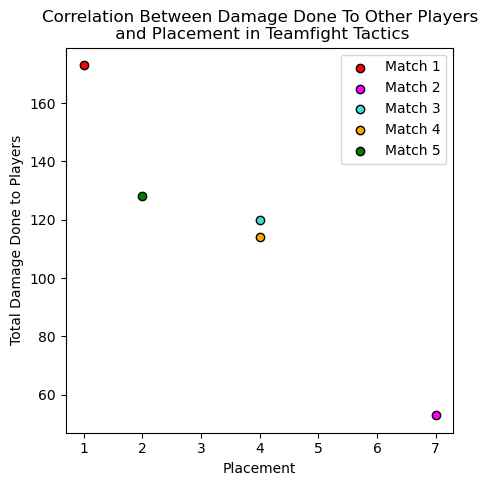

In [128]:
fig1, ax1 = plt.subplots(figsize = (5,5))
ax1.scatter(x = m1_place, y = m1_dmg, label = 'Match 1', color = 'red', edgecolors = 'black')
ax1.scatter(x = m2_place, y = m2_dmg, label = 'Match 2', color = 'magenta', edgecolors = 'black' )
ax1.scatter(x = m3_place, y = m3_dmg, label = 'Match 3', color = 'turquoise', edgecolors = 'black')
ax1.scatter(x = m4_place, y = m4_dmg, label = 'Match 4', color = 'orange', edgecolors = 'black')
ax1.scatter(x = m5_place, y = m5_dmg, label = 'Match 5', color = 'green', edgecolors = 'black')

ax1.set_title('Correlation Between Damage Done To Other Players\n and Placement in Teamfight Tactics')
ax1.set_xlabel('Placement')
ax1.set_ylabel('Total Damage Done to Players')
ax1.legend()

plt.show()

Overall, this data shows that the common conception is correct. It is true that the more player damage a person does to another player, the higher they place. We can see that in match 1, I did above 160 player damage (more specifically, 173 damage to other players and placed 1st. When Looking at Match 5 with 128 player damage done and placing second, and Match 3 with 120 player damage done and placind fourth, we can see that these two numbers closer together but have different placements- however I still placed higher when I did more player damage. When dealing lower player damage, 53, in Match 2, I placed lower- 7th place.








A limitation I had with this project was data security. This type of limitation is not a negative type of limitation. When using the Riot Games Developer Portal, and playing TFT, I had to refresh the API Key, API links, and Match ID’s. Though this was for safety and up-to-date information and API’s, it was very tedious. Another limitation I had was visualizations. With correlation, I was only able to include one visualization that will clearly and accurately show my findings.

An alternative approach for this project would be to examine the correlation between player damage and a specific placement. For example, out of a certain amount of games, how much player damage a player did when they placed eight, third, sixth, etc. A slight limitation of this would be to find a certain amount of games that I placed the certain placement.

Some next steps I would take for this project would be to include other variables in this correlation. I had thought about including gold left after elimination. However, most players typically have little to no gold left after elimination. Another variable I would consider in this project is to examine the correlation between placement and team composition played.